In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('PurchaseData.csv')
df

,Date of Purchase,Purchaser Name,Denomination
0,12-Apr-19,A B C INDIA LIMITED,100000.0
1,12-Apr-19,A B C INDIA LIMITED,100000.0
2,12-Apr-19,A B C INDIA LIMITED,1000000.0
3,12-Apr-19,A B C INDIA LIMITED,1000000.0
4,12-Apr-19,A B C INDIA LIMITED,100000.0
...,...,...,...
19202,11-Jan-24,WESTWELL GASES PRIVATE LIMITED,10000000.0
19203,11-Jan-24,WESTWELL GASES PRIVATE LIMITED,10000000.0
19204,11-Jan-24,WESTWELL GASES PRIVATE LIMITED,10000000.0
19205,11-Jan-24,WESTWELL GASES PRIVATE LIMITED,10000000.0


In [3]:
df.head(10)

,Date of Purchase,Purchaser Name,Denomination
0,12-Apr-19,A B C INDIA LIMITED,100000.0
1,12-Apr-19,A B C INDIA LIMITED,100000.0
2,12-Apr-19,A B C INDIA LIMITED,1000000.0
3,12-Apr-19,A B C INDIA LIMITED,1000000.0
4,12-Apr-19,A B C INDIA LIMITED,100000.0
5,12-Apr-19,A B C INDIA LIMITED,100000.0
6,12-Apr-19,A B C INDIA LIMITED,100000.0
7,12-Apr-19,A B C INDIA LIMITED,1000000.0
8,12-Apr-19,A B C INDIA LIMITED,100000.0
9,12-Apr-19,A B C INDIA LIMITED,100000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19207 entries, 0 to 19206
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date of Purchase  18871 non-null  object 
 1   Purchaser Name    18871 non-null  object 
 2   Denomination      18871 non-null  float64
dtypes: float64(1), object(2)
memory usage: 450.3+ KB


In [5]:
df.columns

Index(['Date of Purchase', 'Purchaser Name', 'Denomination'], dtype='object')

In [6]:
df.describe()


,Denomination
count,1.887100e+04
mean,6.441372e+06
std,4.538947e+06
min,1.000000e+03
25%,1.000000e+06
50%,1.000000e+07
75%,1.000000e+07
max,1.000000e+07


In [7]:
df.isnull().sum()

Date of Purchase    336
Purchaser Name      336
Denomination        336
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

Date of Purchase    0
Purchaser Name      0
Denomination        0
dtype: int64

## 1.Top 10 companies respective of denomintaion.Total amount and visulization

In [9]:
denomination_sum = df.groupby('Purchaser Name')['Denomination'].sum()
top_10 = denomination_sum.sort_values(ascending=False).head(10)
top_10

Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PR               1.208000e+10
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED    8.210000e+09
QWIKSUPPLYCHAINPRIVATELIMITED                     4.100000e+09
HALDIA ENERGY LIMITED                             3.770000e+09
VEDANTA LIMITED                                   3.756500e+09
ESSEL MINING AND INDS LTD                         2.245000e+09
WESTERN UP POWER TRANSMISSION COMPANY LI MITED    2.200000e+09
KEVENTER FOODPARK INFRA LIMITED                   1.950000e+09
MADANLAL LTD.                                     1.855000e+09
BHARTI AIRTEL LIMITED                             1.830000e+09
Name: Denomination, dtype: float64

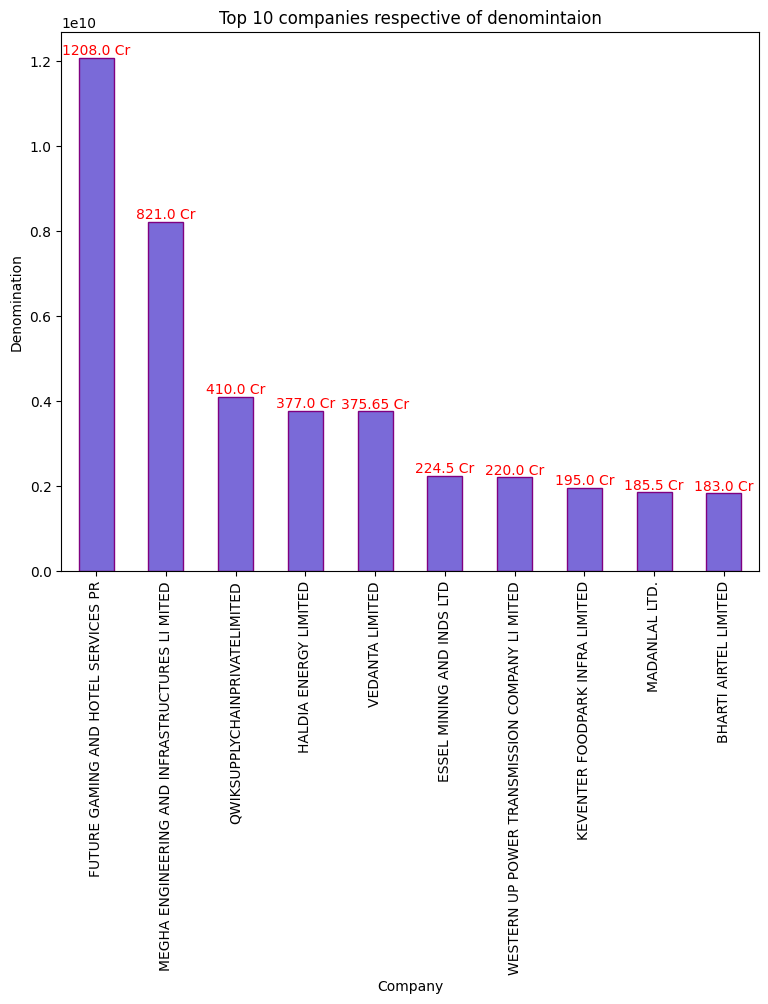

In [10]:
top_10.plot(kind = 'bar', color = '#7a6ad8', edgecolor = 'purple', figsize=(9,7))
plt.title("Top 10 companies respective of denomintaion")
plt.xlabel('Company')
plt.ylabel('Denomination')
for i, v in enumerate(top_10):
    plt.text(i, v, f"{str(v/10000000)} Cr", color='red',horizontalalignment='center', verticalalignment='bottom')

## 2.which day has most transactions.[suppose there 30 days in month.for a given month which day has the max transaction]

In [11]:
while True:
    try :
        df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
        month_name = input("Enter month (e.g., January, February, etc.): ")
        month_number = datetime.datetime.strptime(month_name, "%B").month
        df_by_month = df[df['Date of Purchase'].dt.month == month_number]
        trans_max = df_by_month['Date of Purchase'].value_counts().max()
        trans_date = df_by_month['Date of Purchase'].value_counts().idxmax()
        print(f'Max trans in {month_name} : {trans_date} > {trans_max}')
        break

    except ValueError as e:
        print("You enter wrong input Enter full month name")

C:\Users\SAYAN\AppData\Local\Temp\ipykernel_7856\4090319052.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])


Max trans in April : 2023-04-11 00:00:00 > 549


## Total amount of denomination and their transaction time period in dd/mm/yyyy

In [12]:
df1 = df.groupby('Purchaser Name')['Denomination'].count()
df1

Purchaser Name
14 REELS PLUS LLP                      1
A B C INDIA LIMITED                   13
AAKANKSHA BAHETY                       1
AALAYA CONSTRUCTIONS                   1
AARISH SOLAR POWER PRIVATE LIMITED     2
                                      ..
YUVAN TRADING CONSULTANCY LLP          5
ZENSAR TECHNOLOGIES LTD                3
ZUVAN ENERGY PRIVATE LIMITED           1
ZUVAN ENERGY PVT LTD                   2
ZYDUS HEALTHCARE LIMITED              29
Name: Denomination, Length: 1316, dtype: int64

In [13]:
company_time_period = df.groupby('Purchaser Name')['Date of Purchase'].agg([min, max])
company_time_period

C:\Users\SAYAN\AppData\Local\Temp\ipykernel_7856\697040826.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  company_time_period = df.groupby('Purchaser Name')['Date of Purchase'].agg([min, max])
C:\Users\SAYAN\AppData\Local\Temp\ipykernel_7856\697040826.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  company_time_period = df.groupby('Purchaser Name')['Date of Purchase'].agg([min, max])


,min,max
Purchaser Name,,
14 REELS PLUS LLP,2022-04-08,2022-04-08
A B C INDIA LIMITED,2019-04-12,2019-04-12
AAKANKSHA BAHETY,2022-01-10,2022-01-10
AALAYA CONSTRUCTIONS,2023-07-06,2023-07-06
AARISH SOLAR POWER PRIVATE LIMITED,2023-04-11,2023-04-11
...,...,...
YUVAN TRADING CONSULTANCY LLP,2023-10-12,2023-11-17
ZENSAR TECHNOLOGIES LTD,2019-05-07,2019-05-07
ZUVAN ENERGY PRIVATE LIMITED,2023-04-11,2023-04-11


In [14]:
company_time_period['min'] = company_time_period['min'].dt.strftime('%d/%m/%Y')
company_time_period['max'] = company_time_period['max'].dt.strftime('%d/%m/%Y')


In [15]:
company_time_period = company_time_period.rename(columns={'min': 'start', 'max': 'stop'})

In [16]:
company_time_period

,start,stop
Purchaser Name,,
14 REELS PLUS LLP,08/04/2022,08/04/2022
A B C INDIA LIMITED,12/04/2019,12/04/2019
AAKANKSHA BAHETY,10/01/2022,10/01/2022
AALAYA CONSTRUCTIONS,06/07/2023,06/07/2023
AARISH SOLAR POWER PRIVATE LIMITED,11/04/2023,11/04/2023
...,...,...
YUVAN TRADING CONSULTANCY LLP,12/10/2023,17/11/2023
ZENSAR TECHNOLOGIES LTD,07/05/2019,07/05/2019
ZUVAN ENERGY PRIVATE LIMITED,11/04/2023,11/04/2023


## show the analysis of last 100 trnsacation?

In [17]:
df_sort = df.sort_values(by= 'Date of Purchase', ascending= False).head(100)
df_sort

,Date of Purchase,Purchaser Name,Denomination
19206,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000.0
19061,2024-01-11,RUNGTA SONS P LTD,10000000.0
19059,2024-01-11,RUNGTA SONS P LTD,10000000.0
19058,2024-01-11,RUNGTA SONS P LTD,10000000.0
19057,2024-01-11,RUNGTA SONS P LTD,10000000.0
...,...,...,...
19022,2024-01-11,PACIFICA DEVELOPERS P LTD REFLECTIO,1000000.0
19021,2024-01-11,PACIFICA DEVELOPERS P LTD REFLECTIO,1000000.0
19020,2024-01-11,PACIFICA DEVELOPERS P LTD REFLECTIO,1000000.0
19019,2024-01-11,PACIFICA DEVELOPERS P LTD REFLECTIO,100000.0


In [18]:
denomination_sum = df_sort.groupby('Purchaser Name')['Denomination'].sum()
top_10_last = denomination_sum.sort_values(ascending=False).head(10)
top_10_last

Purchaser Name
RUNGTA SONS P LTD                        490000000.0
SASMAL INFRASTRUCTURE PRIVATE LIMITED     90000000.0
SHIRDI SAI ELECTRICALS LTD                70000000.0
INDERDEEP CONSTRUCTION CO                 60000000.0
GRANULES INDIA LIMITED                    30000000.0
MANU VYAPAR (P) LTD.                      20000000.0
ABHINANDANSTOCKBROKINGPVTLTD              10000000.0
ASHOKA DEVELOPERS                         10000000.0
ASISH FINANCE PRIVATE LIMITED             10000000.0
DYNERE ENGINEERING PRIVATE LIMITED        10000000.0
Name: Denomination, dtype: float64

Text(0.5, 1.0, 'Top 10 companies respective of denomintaion')

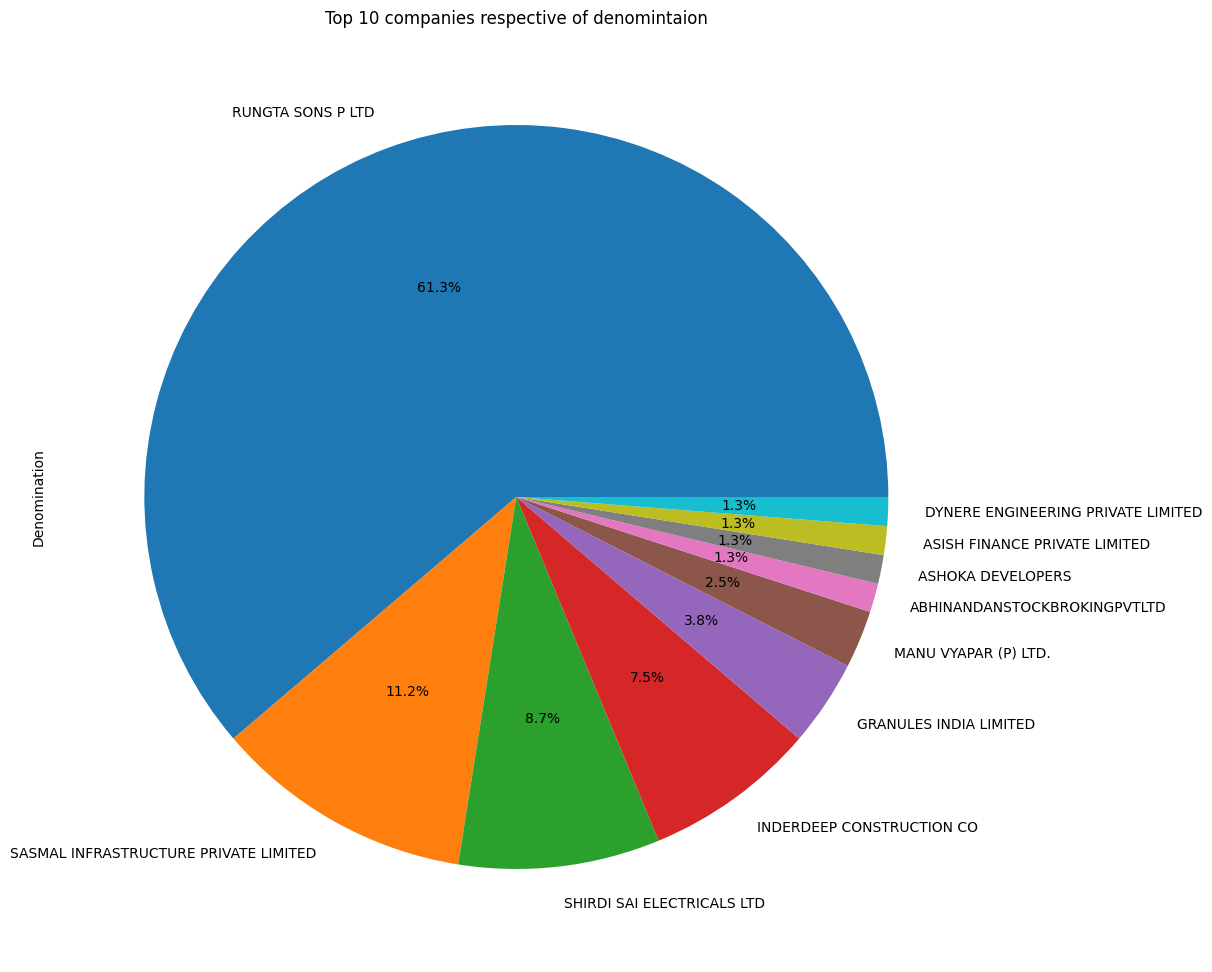

In [19]:
top_10_last.plot(kind = 'pie',autopct='%1.1f%%', color = 'orange', figsize=(12, 15))
plt.title("Top 10 companies respective of denomintaion")
# plt.xlabel('Company')
# plt.ylabel('Denomination')

## 5.suppose in each transaction we apply 2% transaction charge then create a column named tansaction_tax which will be 2% of the denomination.

In [20]:
df['tansaction_tax'] = (df['Denomination'] *2 /100)

In [21]:
df.head(10)

,Date of Purchase,Purchaser Name,Denomination,tansaction_tax
0,2019-04-12,A B C INDIA LIMITED,100000.0,2000.0
1,2019-04-12,A B C INDIA LIMITED,100000.0,2000.0
2,2019-04-12,A B C INDIA LIMITED,1000000.0,20000.0
3,2019-04-12,A B C INDIA LIMITED,1000000.0,20000.0
4,2019-04-12,A B C INDIA LIMITED,100000.0,2000.0
5,2019-04-12,A B C INDIA LIMITED,100000.0,2000.0
6,2019-04-12,A B C INDIA LIMITED,100000.0,2000.0
7,2019-04-12,A B C INDIA LIMITED,1000000.0,20000.0
8,2019-04-12,A B C INDIA LIMITED,100000.0,2000.0
9,2019-04-12,A B C INDIA LIMITED,100000.0,2000.0


#### i.Now plot the top 10 companies based on denominatioin.

In [22]:
denomination_sum = df.groupby('Purchaser Name')['Denomination'].sum()
top_10 = denomination_sum.sort_values(ascending=False).head(10)
top_10

Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PR               1.208000e+10
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED    8.210000e+09
QWIKSUPPLYCHAINPRIVATELIMITED                     4.100000e+09
HALDIA ENERGY LIMITED                             3.770000e+09
VEDANTA LIMITED                                   3.756500e+09
ESSEL MINING AND INDS LTD                         2.245000e+09
WESTERN UP POWER TRANSMISSION COMPANY LI MITED    2.200000e+09
KEVENTER FOODPARK INFRA LIMITED                   1.950000e+09
MADANLAL LTD.                                     1.855000e+09
BHARTI AIRTEL LIMITED                             1.830000e+09
Name: Denomination, dtype: float64

Text(0, 0.5, 'Denomination')

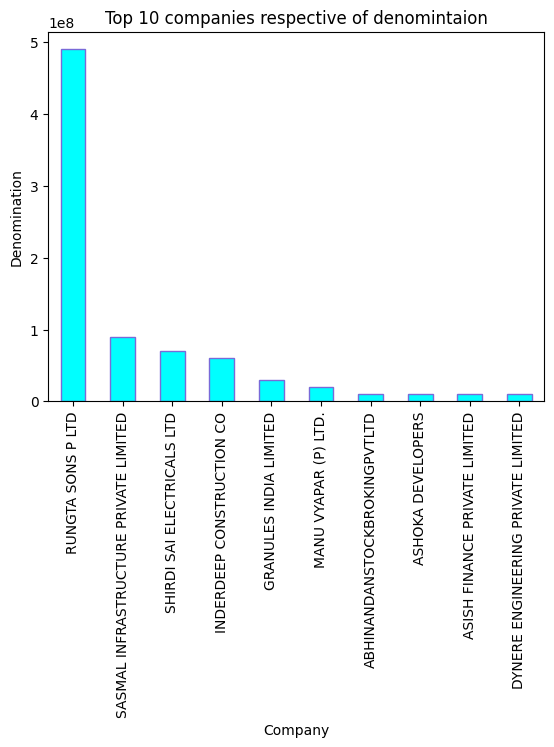

In [23]:
top_10_last.plot(kind = 'bar', color = 'cyan', edgecolor = '#7a6ad8')
plt.title("Top 10 companies respective of denomintaion")
plt.xlabel('Company')
plt.ylabel('Denomination')

ii.Group all the companies then show total amount given by then in entire session?
    abc done 3 transaction on apr2019,jul2020,mar2021 then the new row will be like 
    company_name     session             amount
    abc              apr2019 - mar2021  total sum
    
    now do the visualization for that and show top and bottom 10 comapnies.

In [24]:
company_total_amount = df.groupby('Purchaser Name')['Denomination'].sum()
company_total_amount

Purchaser Name
14 REELS PLUS LLP                      10000000.0
A B C INDIA LIMITED                     4000000.0
AAKANKSHA BAHETY                        1000000.0
AALAYA CONSTRUCTIONS                   10000000.0
AARISH SOLAR POWER PRIVATE LIMITED     20000000.0
                                         ...     
YUVAN TRADING CONSULTANCY LLP          50000000.0
ZENSAR TECHNOLOGIES LTD                30000000.0
ZUVAN ENERGY PRIVATE LIMITED           10000000.0
ZUVAN ENERGY PVT LTD                   20000000.0
ZYDUS HEALTHCARE LIMITED              290000000.0
Name: Denomination, Length: 1316, dtype: float64

In [25]:
company_session = df.groupby('Purchaser Name')['Date of Purchase'].agg(['min', 'max'])
company_session

,min,max
Purchaser Name,,
14 REELS PLUS LLP,2022-04-08,2022-04-08
A B C INDIA LIMITED,2019-04-12,2019-04-12
AAKANKSHA BAHETY,2022-01-10,2022-01-10
AALAYA CONSTRUCTIONS,2023-07-06,2023-07-06
AARISH SOLAR POWER PRIVATE LIMITED,2023-04-11,2023-04-11
...,...,...
YUVAN TRADING CONSULTANCY LLP,2023-10-12,2023-11-17
ZENSAR TECHNOLOGIES LTD,2019-05-07,2019-05-07
ZUVAN ENERGY PRIVATE LIMITED,2023-04-11,2023-04-11


In [26]:
company_session['Session'] = company_session['min'].dt.strftime('%b%y') + '-' + company_session['max'].dt.strftime('%b%y')

In [27]:
company_session

,min,max,Session
Purchaser Name,,,
14 REELS PLUS LLP,2022-04-08,2022-04-08,Apr22-Apr22
A B C INDIA LIMITED,2019-04-12,2019-04-12,Apr19-Apr19
AAKANKSHA BAHETY,2022-01-10,2022-01-10,Jan22-Jan22
AALAYA CONSTRUCTIONS,2023-07-06,2023-07-06,Jul23-Jul23
AARISH SOLAR POWER PRIVATE LIMITED,2023-04-11,2023-04-11,Apr23-Apr23
...,...,...,...
YUVAN TRADING CONSULTANCY LLP,2023-10-12,2023-11-17,Oct23-Nov23
ZENSAR TECHNOLOGIES LTD,2019-05-07,2019-05-07,May19-May19
ZUVAN ENERGY PRIVATE LIMITED,2023-04-11,2023-04-11,Apr23-Apr23


In [28]:
company_summary = pd.merge(company_total_amount, company_session['Session'], left_index=True, right_index=True)

In [29]:
company_summary

,Denomination,Session
Purchaser Name,,
14 REELS PLUS LLP,10000000.0,Apr22-Apr22
A B C INDIA LIMITED,4000000.0,Apr19-Apr19
AAKANKSHA BAHETY,1000000.0,Jan22-Jan22
AALAYA CONSTRUCTIONS,10000000.0,Jul23-Jul23
AARISH SOLAR POWER PRIVATE LIMITED,20000000.0,Apr23-Apr23
...,...,...
YUVAN TRADING CONSULTANCY LLP,50000000.0,Oct23-Nov23
ZENSAR TECHNOLOGIES LTD,30000000.0,May19-May19
ZUVAN ENERGY PRIVATE LIMITED,10000000.0,Apr23-Apr23


In [30]:
company_summary = company_summary.rename(columns={'Denomination': 'Amount'})

Text(0, 0.5, '')

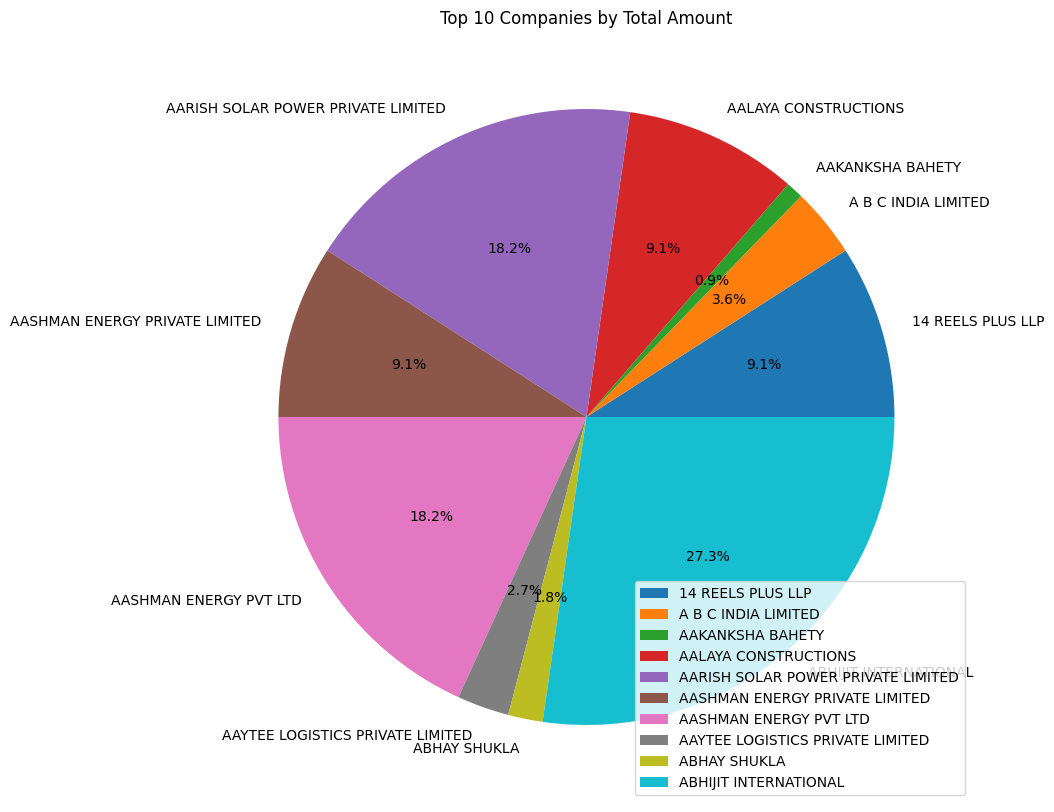

In [31]:
# Top 10 companies
top_10 = company_summary.head(10)
top_10.plot(kind='pie', y='Amount', autopct='%1.1f%%', figsize=(15, 10))
plt.title('Top 10 Companies by Total Amount')
plt.ylabel('')


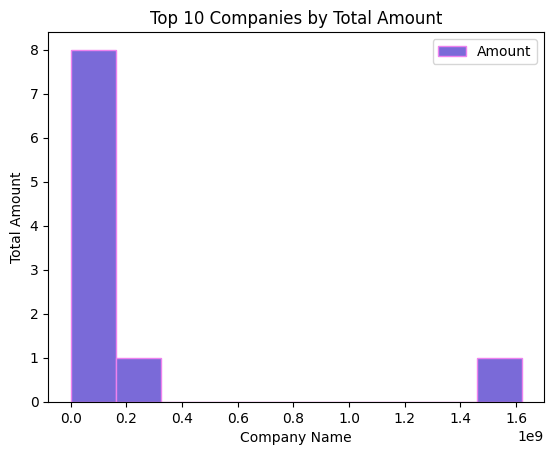

In [32]:
# Bottom 10 companies
bottom_10 = company_summary.tail(10)
bottom_10.plot(kind='hist', y='Amount', color = '#7a6ad8', edgecolor = 'violet')
plt.title('Top 10 Companies by Total Amount')
plt.xlabel('Company Name')
plt.ylabel('Total Amount')
plt.show()

#### top and bottom according to amount 

In [33]:
denomination_sum = company_summary.groupby('Purchaser Name')['Amount'].sum()
top10 = denomination_sum.sort_values(ascending=False).head(10)
top10

Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PR               1.208000e+10
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED    8.210000e+09
QWIKSUPPLYCHAINPRIVATELIMITED                     4.100000e+09
HALDIA ENERGY LIMITED                             3.770000e+09
VEDANTA LIMITED                                   3.756500e+09
ESSEL MINING AND INDS LTD                         2.245000e+09
WESTERN UP POWER TRANSMISSION COMPANY LI MITED    2.200000e+09
KEVENTER FOODPARK INFRA LIMITED                   1.950000e+09
MADANLAL LTD.                                     1.855000e+09
BHARTI AIRTEL LIMITED                             1.830000e+09
Name: Amount, dtype: float64

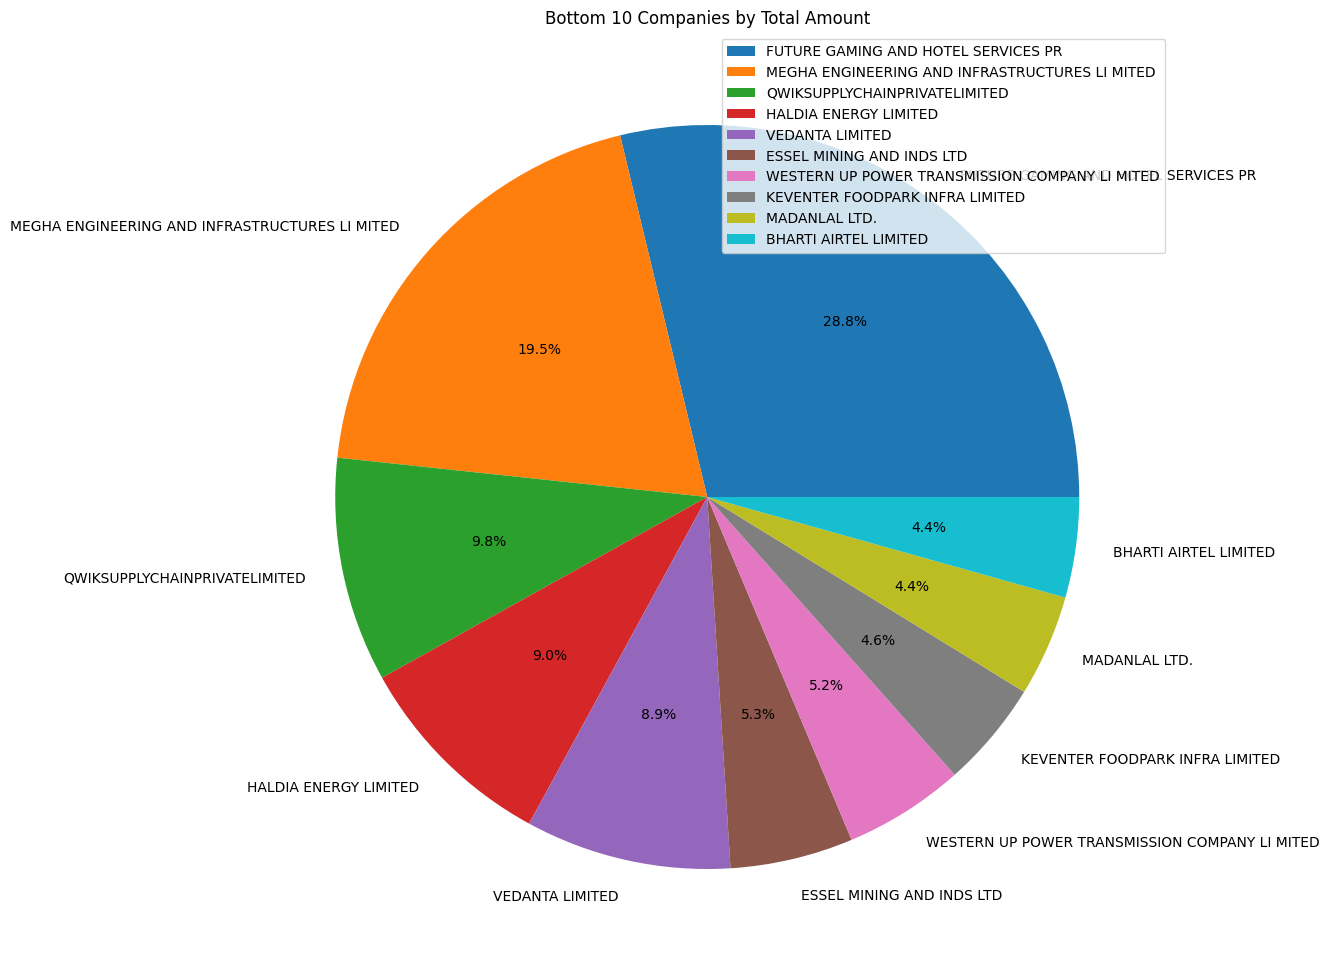

In [34]:
top10.plot(kind='pie',  y='Amount', autopct='%1.1f%%', figsize=(12, 15))
plt.ylabel('')
plt.title('Bottom 10 Companies by Total Amount')
plt.legend(loc='upper right')


In [35]:
bottom10 = denomination_sum.sort_values(ascending=False).tail(10)
bottom10

Purchaser Name
PUNIT DEVENDRABHAI BHANDERI       1000.0
PAWAN AGARWAL                     1000.0
DAMINI NATH                       1000.0
ARAVIND S                         1000.0
ADWITA FINVEST PRIVATE LIMITED    1000.0
POONAM AGARWAL                    1000.0
KUNAL GUPTA                       1000.0
N RAMAMOORTHY                     1000.0
ANKUR SINGHAL S O SH ANIL SIN     1000.0
MR. SAMEER BHATIA                 1000.0
Name: Amount, dtype: float64

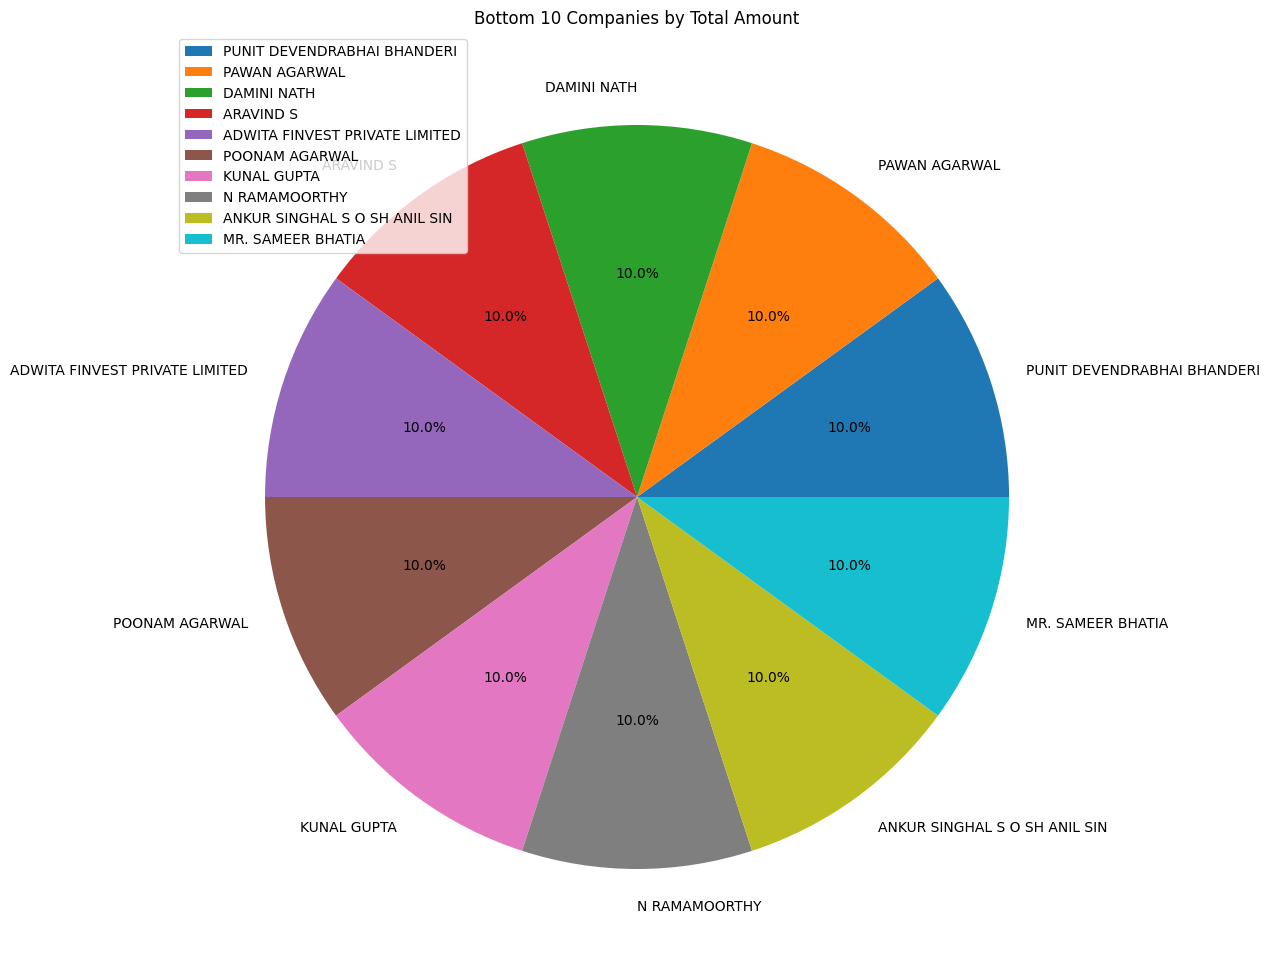

In [36]:
bottom10.plot(kind='pie',  y='Amount', autopct='%1.1f%%', figsize=(12, 15))
plt.ylabel('')
plt.title('Bottom 10 Companies by Total Amount')
plt.legend(loc='upper left')

In [38]:
df.head()

,Date of Purchase,Purchaser Name,Denomination,tansaction_tax
0,2019-04-12,A B C INDIA LIMITED,100000.0,2000.0
1,2019-04-12,A B C INDIA LIMITED,100000.0,2000.0
2,2019-04-12,A B C INDIA LIMITED,1000000.0,20000.0
3,2019-04-12,A B C INDIA LIMITED,1000000.0,20000.0
4,2019-04-12,A B C INDIA LIMITED,100000.0,2000.0


In [41]:
X = df.groupby(df['Date of Purchase'].dt.to_period('Y'))['Denomination'].sum()
X

Date of Purchase
2019    1.766128e+10
2020    3.639601e+09
2021    1.502293e+10
2022    3.704858e+10
2023    4.246474e+10
2024    5.718003e+09
Freq: Y-DEC, Name: Denomination, dtype: float64

<Axes: xlabel='Date of Purchase'>

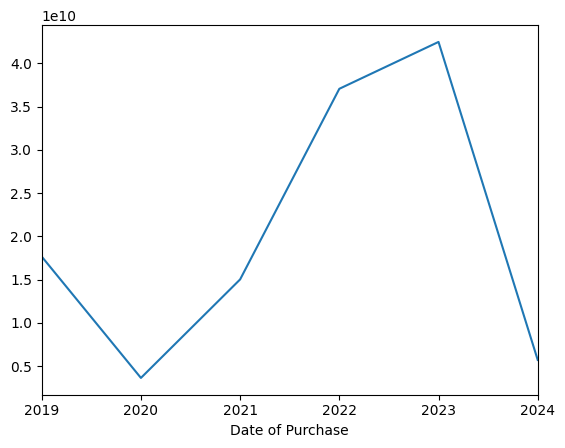

In [44]:
X.plot(kind="line")